In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
df = pd.DataFrame (iris["data"] , columns = iris["feature_names"])

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler  = StandardScaler()

In [11]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
df_scaler = scaler.transform(df)

In [13]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)

In [16]:
pca.fit(df_scaler)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pc12 = pca.transform(df_scaler)

In [18]:
df_pca = pd.DataFrame (data = pc12 , columns = ["PC1" , "PC2"])

In [19]:
df_pca.head()

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


Text(0, 0.5, 'PC2')

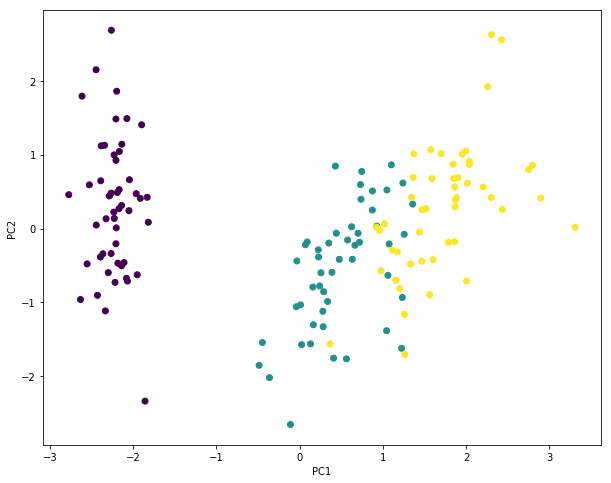

In [26]:
plt.figure (figsize = (10,8))
plt.scatter (x = df_pca ["PC1"] , y = df_pca ["PC2"] , c = iris["target"])
                                                                
plt.xlabel("PC1")        
plt.ylabel("PC2")                                                              


In [28]:
pca.components_

df_pca_comp = pd.DataFrame ( pca.components_ , columns = iris["feature_names"])


In [29]:
df_pca_comp.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.521066,-0.269347,0.580413,0.564857
1,0.377418,0.923296,0.024492,0.066942


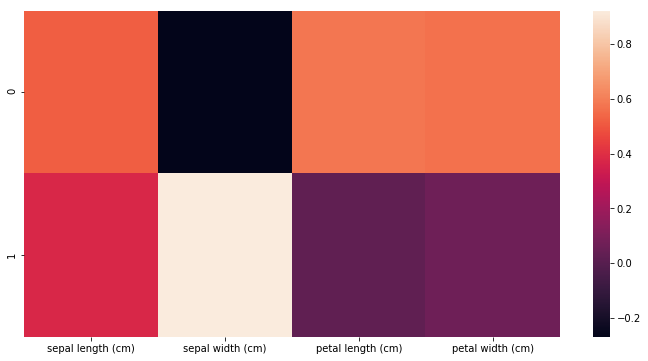

In [31]:
plt.figure (figsize = (12,6))
sns.heatmap(df_pca_comp)

In [35]:
X = df_pca
y = iris["target"]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [38]:
from sklearn.svm import SVC

In [40]:
model = SVC()

In [41]:
model.fit(X_train , y_train)

/home/unbeatable/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [42]:
pred = model.predict (X_test)

In [43]:
from sklearn.metrics import classification_report , confusion_matrix

In [44]:
print( classification_report (y_test , pred))
print( confusion_matrix (y_test , pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      0.85      0.88        13
           2       0.86      0.92      0.89        13

   micro avg       0.93      0.93      0.93        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.93      0.93      0.93        45

[[19  0  0]
 [ 0 11  2]
 [ 0  1 12]]
